In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [33]:
data = pd.read_csv('../06.RegresionLineal/Cars93.csv')

In [34]:
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize',    'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']])
Y = np.array(data['Price'].values.reshape(-1,1))

In [35]:
a = []
b = []
n = np.logspace(-5,0,100)
for i in n:
    linear = sklearn.linear_model.Lasso(alpha=i, normalize=True)
    linear.fit(X,Y)
    a.append(linear.coef_)
    b.append(linear.intercept_)

Text(0.5, 1.0, 'Coeficientes vs Alpha (log)')

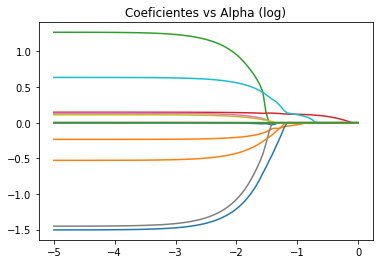

In [36]:
plt.plot(np.log10(n),a)
plt.title("Coeficientes vs Alpha (log)")

##### 

In [37]:
n = np.logspace(-5,0,100)
mean = []
for i in n:
    loo = sklearn.model_selection.LeaveOneOut()
    loo.get_n_splits(X)
    l = []
    for train_index, test_index in loo.split(X):
        linear = sklearn.linear_model.Lasso(alpha=i, normalize=True)
        linear.fit(X[train_index,:],Y[train_index])
        l.append(sklearn.metrics.mean_squared_error(Y[test_index], linear.predict(X[test_index])))
    l = np.array(l)
    mean.append(np.mean(l))

Text(0.5, 1.0, 'Error vs Alpha (log)')

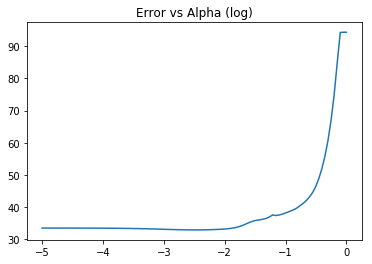

In [38]:
plt.plot(np.log10(n),mean)
plt.title("Error vs Alpha (log)")